#    BANK MARKETING PREDICTION

#### We are going to do prediction on a Bank Marketing
#### The Notebook Visualize the data from Bank Marketing and predict if the customer will respond positively to the campaign or not.
#### Also we are going to compare the result genereted by Logistic Regression and Random forest.

## Importing Libraries

In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [312]:
# Considering df as variable.

In [313]:
df = pd.read_csv('bank-marketing.csv')

In [314]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA & Visualization

In [315]:
df.shape

(45211, 19)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [317]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

#### There is no null value present in the dataset 

In [318]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [319]:
# Counting the values of response

df.response.value_counts()


no     39922
yes     5289
Name: response, dtype: int64

#### Mostly response from the customer is NO

In [320]:
# Converting response into numerical form

df['Response'] = df.response.apply(lambda x:1 if x == 'yes' else 0)

In [321]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [322]:
# Removing the contact column as it of no use
df.drop('contact', axis = 1)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [323]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)


In [324]:
# Converting month into Numerical form

lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_name"] = 1
    column.loc[column["month"] == "feb", "month_name"] = 2
    column.loc[column["month"] == "mar", "month_name"] = 3
    column.loc[column["month"] == "apr", "month_name"] = 4
    column.loc[column["month"] == "may", "month_name"] = 5
    column.loc[column["month"] == "jun", "month_name"] = 6
    column.loc[column["month"] == "jul", "month_name"] = 7
    column.loc[column["month"] == "aug", "month_name"] = 8
    column.loc[column["month"] == "sep", "month_name"] = 9
    column.loc[column["month"] == "oct", "month_name"] = 10
    column.loc[column["month"] == "nov", "month_name"] = 11
    column.loc[column["month"] == "dec", "month_name"] = 12

In [325]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,Response,month_name
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,...,5,may,4.35,1,-1,0,unknown,no,0,5.0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,...,5,may,2.52,1,-1,0,unknown,no,0,5.0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,...,5,may,1.27,1,-1,0,unknown,no,0,5.0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,...,5,may,1.53,1,-1,0,unknown,no,0,5.0
4,33,unknown,0,single,unknown,no,no,1,no,no,...,5,may,3.30,1,-1,0,unknown,no,0,5.0


In [326]:
# As per the instructions, Performing all the Questions which are mentioned.

#### 1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

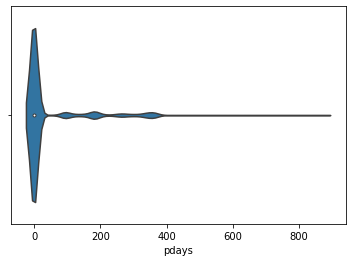

In [327]:
sns.violinplot(df.pdays, data = df)


In [328]:
print('median',df.pdays.median())
print('mean:',df.pdays.mean())
print('mode:',df.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


#### There is a huge siginificant difference between mean and median

#### 2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [329]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [330]:
df1 = df[df.pdays != -1]

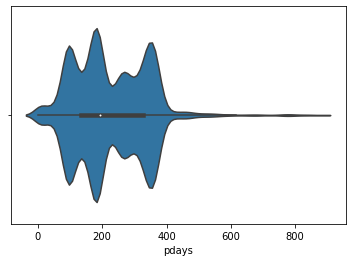

In [331]:
sns.violinplot(df1.pdays)
plt.show()

In [332]:
print('median',df1.pdays.median())
print('mean:',df1.pdays.mean())
print('mode:',df1.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


#### Now it seems that there is not much variance between mean and median

#### 3. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [333]:
df1.balance.describe()

count     8257.000000
mean      1556.880102
std       3060.593186
min      -1884.000000
25%        168.000000
50%        602.000000
75%       1743.000000
max      81204.000000
Name: balance, dtype: float64

In [334]:
df1.education.value_counts()

secondary    4254
tertiary     2660
primary      1020
unknown       323
Name: education, dtype: int64

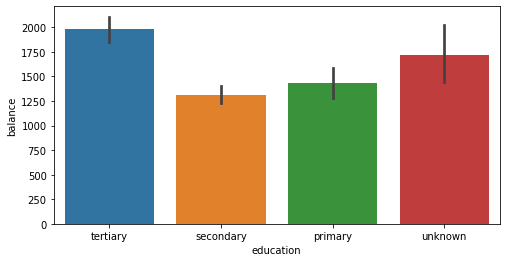

In [335]:
plt.figure(figsize = (8, 4))
sns.barplot(x = 'education', y = 'balance', data = df1)
plt.show()

#### Tertiary group has a highest median

#### 4. Make a box plot for pdays. Do you see any outliers?

outlier without -1


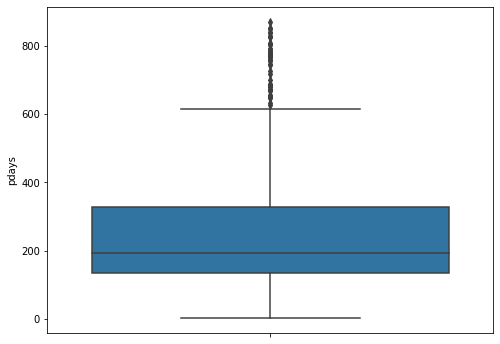

In [336]:
plt.figure(figsize = (8, 6))
sns.boxplot(y = df1.pdays, data = df)
print('outlier without -1')


#### Yes there are outliers in pdays.

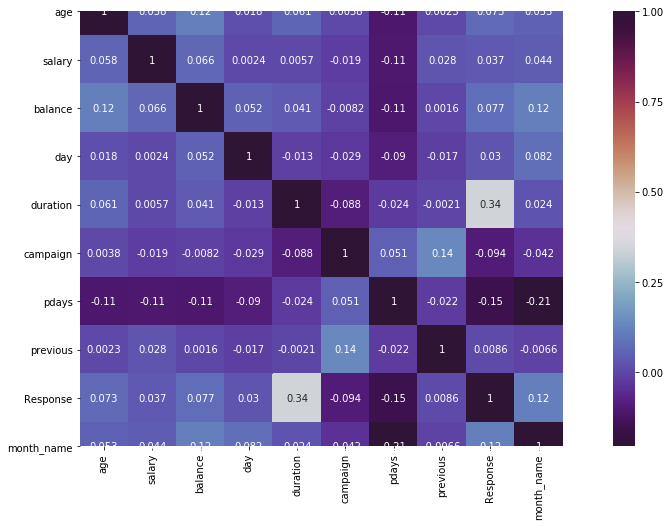

In [337]:
plt.figure(figsize=(18,8))
sns.heatmap(df1.corr(),square=True,annot=True,cmap= 'twilight_shifted')

## Visualizing Categorical Features with Response.


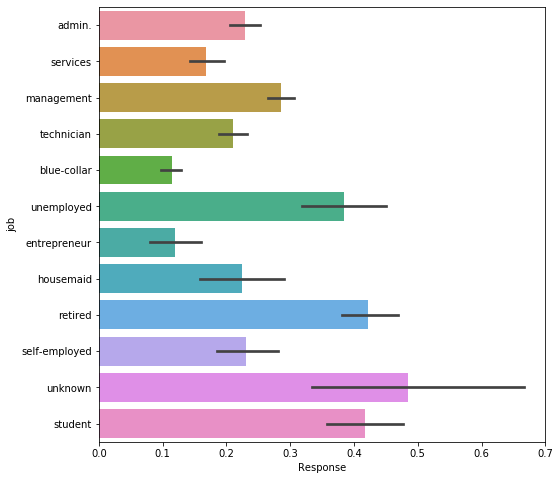

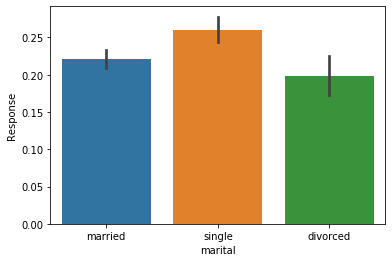

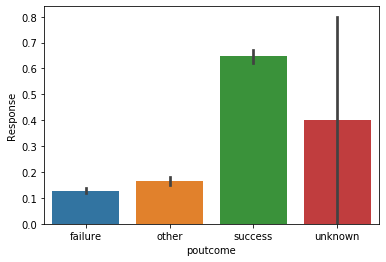

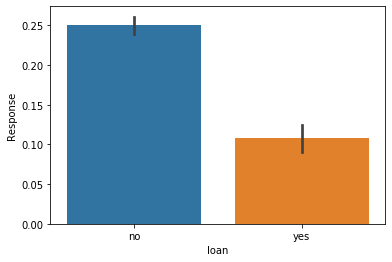

In [338]:
plt.figure(figsize = (8, 8))
sns.barplot(y = 'job', x = 'Response', data = df1)
plt.show()
sns.barplot(x = 'marital', y = 'Response', data = df1)
plt.show()
sns.barplot(x = 'poutcome', y = 'Response', data = df1)
plt.show()
sns.barplot(x = 'loan', y = 'Response', data = df1)
plt.show()

## Visualizing Numerical Features with Response.

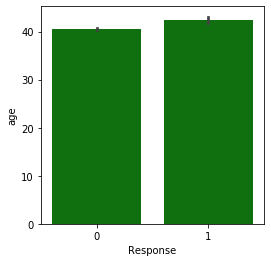

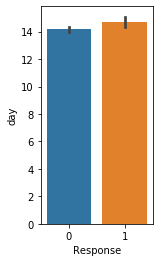

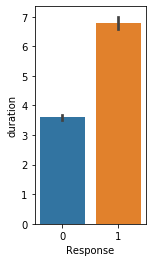

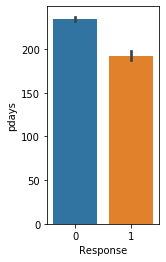

In [339]:
plt.figure(figsize = (4, 4))
sns.barplot(y = 'age', x = 'Response', data = df1, color= 'g')


plt.figure(figsize = (2, 4))
sns.barplot(y = 'day', x = 'Response', data = df1)

plt.figure(figsize = (2, 4))
sns.barplot(y = 'duration', x = 'Response', data = df1)

plt.figure(figsize = (2, 4))
sns.barplot(y = 'pdays', x = 'Response', data = df1)


## Logistic regression

### Training & Testing Split

In [340]:
y = df1.Response
X = df1.loc[:,['duration', 'previous', 'day', 'salary', 'month_name']]

In [341]:
from sklearn.model_selection import train_test_split

In [342]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=16)

In [343]:
from sklearn.linear_model import LogisticRegression

In [344]:
model = LogisticRegression()

In [345]:
model.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [346]:
y_predict = model.predict(X_test)

In [347]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [348]:
y_test

44516    1
42926    0
41475    1
26511    0
28267    0
        ..
37482    0
44700    0
39789    0
38829    0
43551    0
Name: Response, Length: 2478, dtype: int64

In [349]:
from sklearn.model_selection import cross_val_score

In [350]:
print('kfold cross validation:\n',cross_val_score(model, X, y, cv=5))

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

kfold cross validation:
 [0.76937046 0.67978208 0.75651121 0.76256814 0.76135675]


# Model Evaluation

In [351]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1916
           1       0.52      0.15      0.23       562

    accuracy                           0.78      2478
   macro avg       0.66      0.55      0.55      2478
weighted avg       0.73      0.78      0.72      2478



In [352]:
confusion_matrix(y_test, y_predict)

array([[1839,   77],
       [ 479,   83]], dtype=int64)

In [353]:
from sklearn import metrics 

In [354]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.7756255044390638
Precision: 0.51875
Recall: 0.14768683274021352


## Random forest

In [355]:
from sklearn.ensemble import RandomForestClassifier

In [356]:
y = df1.Response
X = df1.loc[:,['duration', 'previous', 'day', 'salary', 'month_name']]

In [357]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [358]:
model1 = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)


In [359]:
model1 = RandomForestClassifier()

In [360]:
model1.fit(X_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [361]:
y_predict = model1.predict(X_test)

In [362]:
y_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [363]:
y_test

28761    0
45119    1
40023    1
34828    0
32685    0
        ..
27935    0
36411    0
26192    1
29848    0
26579    1
Name: Response, Length: 2478, dtype: int64

In [364]:
print('kfold cross validation:\n',cross_val_score(model1, X, y, cv=5))

kfold cross validation:
 [0.56174334 0.52723971 0.60569352 0.68079952 0.46396124]


In [365]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1883
           1       0.66      0.48      0.56       595

    accuracy                           0.82      2478
   macro avg       0.76      0.70      0.72      2478
weighted avg       0.80      0.82      0.81      2478



In [366]:
confusion_matrix(y_test, y_predict)

array([[1739,  144],
       [ 311,  284]], dtype=int64)

In [367]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))


Accuracy: 0.8163841807909604
Precision: 0.6635514018691588
Recall: 0.4773109243697479


### Comparision between Logistic Regression and Random forest

#### -- As for the comparision, we have taken the same Xtrain data in both the Algorthims

#### -- Based on the accuracy, Logistic Regression shows about 77% and Random forest shows about 81%

#### -- According to the accuracy We wil select <u>Random forest Algorithm for the prediction based on its accuracy</u>.

#### -- Also the precision and Recall of Random forest is much higher than the Logistic Regression.